In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "checkindata"

# Check- In Analysis


## Ask
I was given the task of counting how many students checked in to our wellness center during a particular week in November. I was also asked to breakdown the check-ins by grade, ethnicity, and reason. 

## Prepare

For privacy reasons, the data used for this project is dummy data created by myself. The data is organized by date, id number, grade level, reason code, and ethnicity code. The ethnicity and reason codes are numbers that correspond to a partcular reason for coming to the wellness center and a particular ethnicity.

### Setting up my packages

In [2]:
library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Importing the dataset

In [3]:
dd <-read_csv("../input/checkindata/dummy_data.csv")

New names:
* `Reason Code` -> `Reason Code...4`
* `Ethnicity Code` -> `Ethnicity Code...5`
* `` -> ...6
* `Reason Code` -> `Reason Code...8`
* `` -> ...10
* ...

Rows: 3243 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Date, Reason Type, Ethnicity
dbl (7): Id Number, Grade, Reason Code...4, Ethnicity Code...5, Reason Code....
lgl (4): ...6, ...10, ...11, ...14


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
str(dd)

spec_tbl_df [3,243 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date               : chr [1:3243] "8/11/2021 10:39" "8/11/2021 10:40" "8/11/2021 10:40" "8/11/2021 10:45" ...
 $ Id Number          : num [1:3243] 1 2 3 4 5 6 7 8 9 10 ...
 $ Grade              : num [1:3243] 11 11 11 12 11 10 12 12 10 10 ...
 $ Reason Code...4    : num [1:3243] 2 2 2 2 2 2 2 2 6 2 ...
 $ Ethnicity Code...5 : num [1:3243] 1 4 5 4 8 4 7 4 9 11 ...
 $ ...6               : logi [1:3243] NA NA NA NA NA NA ...
 $ Reason Type        : chr [1:3243] "therapist" "snack" "break" "resources" ...
 $ Reason Code...8    : num [1:3243] 1 2 3 4 5 6 NA NA NA NA ...
 $ Number of Students : num [1:3243] 476 1223 1078 108 89 ...
 $ ...10              : logi [1:3243] NA NA NA NA NA NA ...
 $ ...11              : logi [1:3243] NA NA NA NA NA NA ...
 $ Ethnicity          : chr [1:3243] "Black" "Chinese" "Filipino" "White" ...
 $ Ethnicity Code...13: num [1:3243] 1 2 3 4 5 6 7 8 9 10 ...
 $ ...14              : logi [1:3243] 

I notice the date column is a character type so I mutate the data type to a date type

In [5]:
dd2 <-dd %>% 
  mutate(dd,Date = as.Date(dd$Date, format = "%m/%d/%Y"))


I filter the data to the week of November 1st - November 5th

In [6]:
dd3 <-dd2 %>% 
  filter(Date > "2021-10-31" & Date < "2021-11-06")


I also clean the column names

In [7]:
dd4 <-clean_names(dd3)

## Processing the data

I begin to the recode the reason_code column and replace the number codes with the corresponding reasons

In [8]:
dd5 <- dd4 %>% 
  mutate(reason = recode(reason_code_4,
                         "1" = "therapist",
                         "2" = "snack",
                         "3" = "break",
                         "4" = "resources",
                         "5" = "space",
                         "6" = "other",
                         .default = "no"))

I also recode the ethinicity code column and replace the number codes with the corresponding ethinicities

In [9]:
dd6 <- dd5 %>% 
  mutate(ethnicity = recode(ethnicity_code_5,
                            "1" = "Black",
                            "2" = "Chinese",
                            "3" = "Filipino",
                            "4" = "White",
                            "5" = "Vietnamese",
                            "6" = "Pacific Islander",
                            "7" = "Japanese",
                            "8" = "Multi-Racial",
                            "9" = "Other",
                            "10" = "Asian Indian",
                            "11" = "Hispanic",
                            .default = "no")) %>% 
  select(date, id_number, grade,reason, ethnicity)


## Analysis

I broke down the number of check-ins per day

In [10]:
num_check_ins_<-dd6 %>% 
  group_by(date) %>% 
  summarize(check_ins = n())
View(num_check_ins_)


date,check_ins
<date>,<int>
2021-11-01,55
2021-11-02,74
2021-11-03,53
2021-11-04,53
2021-11-05,58


Next I created visualizations for the number of check-ins by grade level, reason, and ethnicity

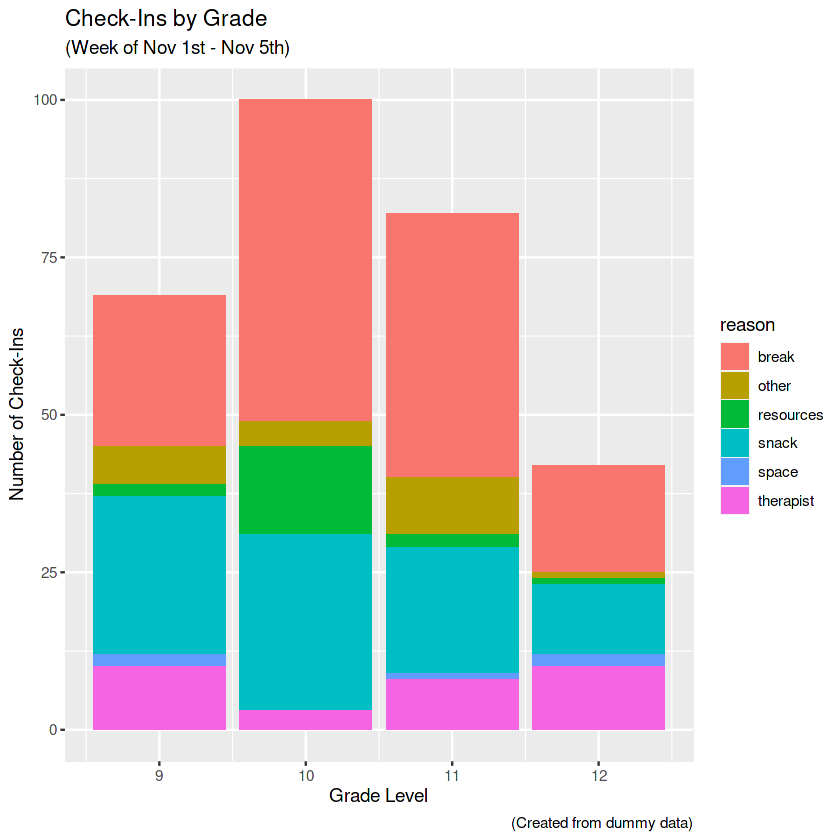

In [11]:
ggplot(data = dd6)+
  geom_bar(mapping=aes(x=grade, fill = reason))+
  labs(title = "Check-Ins by Grade",subtitle = "(Week of Nov 1st - Nov 5th)", x = "Grade Level", y = "Number of Check-Ins", caption = "(Created from dummy data)" )


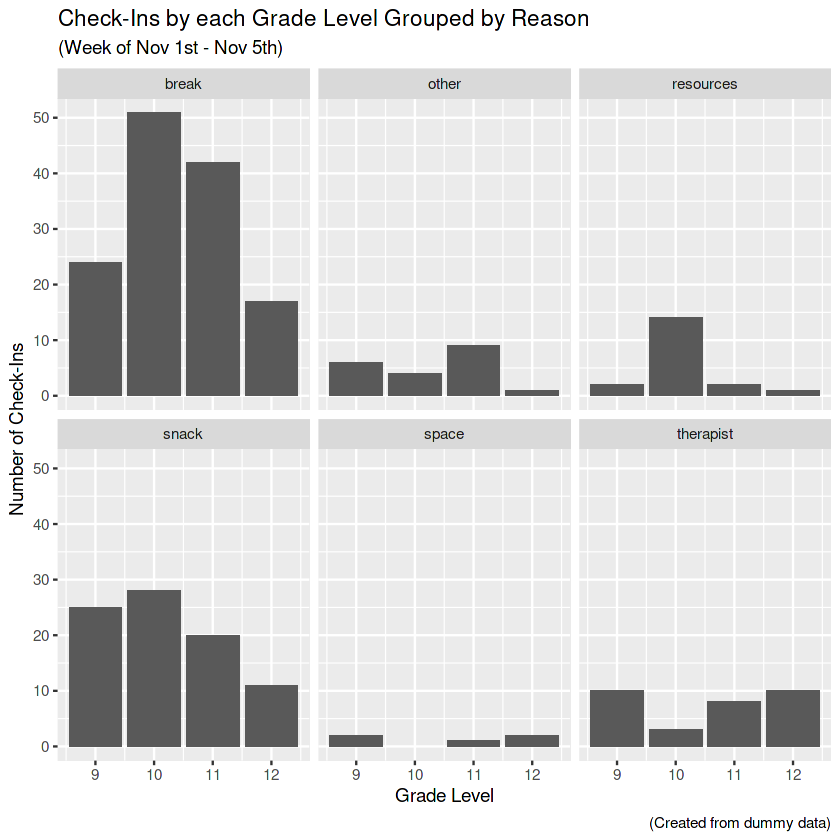

In [12]:
ggplot(data = dd6)+
  geom_bar(mapping=aes(x=grade, fill = grade))+
  facet_wrap(~reason)+
  labs(title = "Check-Ins by each Grade Level Grouped by Reason",subtitle = "(Week of Nov 1st - Nov 5th)", caption = "(Created from dummy data)", x="Grade Level",y="Number of Check-Ins")

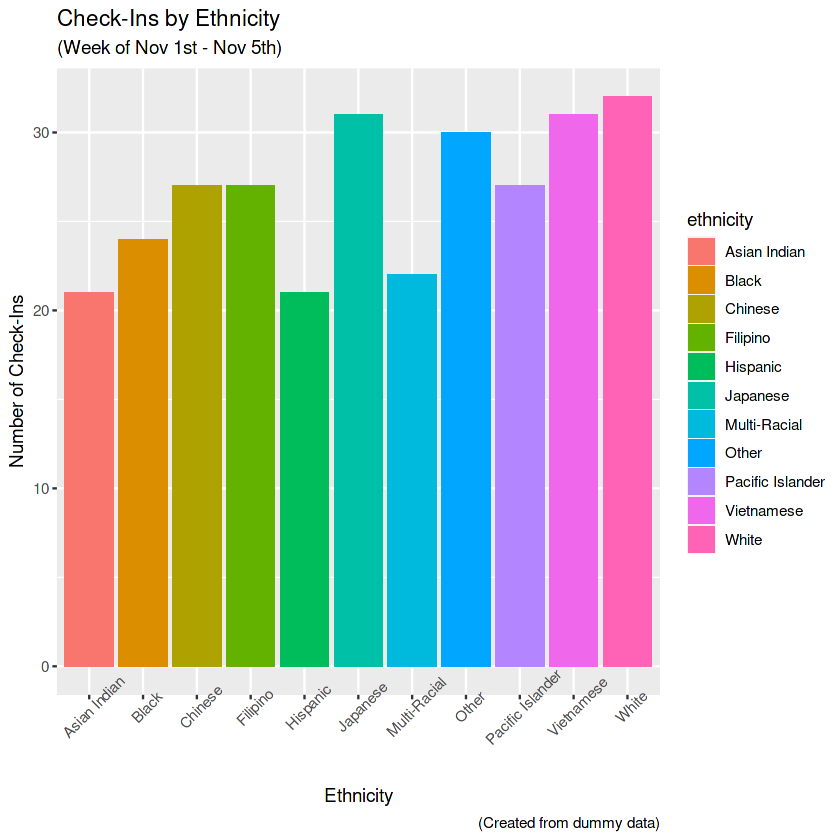

In [13]:
ggplot(data = dd6)+
  geom_bar(mapping=aes(x=ethnicity, fill = ethnicity))+
theme(axis.text.x = element_text(angle = 45))+
  labs(title = "Check-Ins by Ethnicity",subtitle = "(Week of Nov 1st - Nov 5th)", caption = "(Created from dummy data)", x="Ethnicity",y="Number of Check-Ins")

## Act

From the visualizations we can see that during the week of Nov 1st - Nov 5th, the the grade level that checked in the most were 10th graders. The most common reason for a check in was to take a break. Finally, students who identify as white were checked into the center the most. 